Import Libraries for data manipulation, modeling, visualization, and feature scaling.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Dataset Creation

In [3]:
# Example cybersecurity dataset
data = {
    'event_type': ['normal', 'phishing', 'dos_attack', 'malware', 'normal', 'phishing', 'dos_attack'],
    'packet_size': [400, 1200, 5000, 2300, 450, 1300, 5200],
    'failed_logins': [0, 5, 0, 2, 0, 4, 0],
    'suspicious_port': [0, 0, 1, 1, 0, 0, 1],
    'connection_duration': [60, 10, 300, 100, 55, 15, 280]
}

df = pd.DataFrame(data)
print(df.head())  # Shows first 5 rows



   event_type  packet_size  failed_logins  suspicious_port  \
0      normal          400              0                0   
1    phishing         1200              5                0   
2  dos_attack         5000              0                1   
3     malware         2300              2                1   
4      normal          450              0                0   

   connection_duration  
0                   60  
1                   10  
2                  300  
3                  100  
4                   55  


Preprocessing: Convert attack names to numbers for the model

In [5]:
# Encode labels (event types)
le = LabelEncoder()
df['event_label'] = le.fit_transform(df['event_type'])


Split Data and Train Model: Splits data into training sets and trains the model with scaled features. Scaling ensures covergence, random_state+2 ensures reproducibility.

In [6]:
# Features & labels
X = df[['packet_size', 'failed_logins', 'suspicious_port','connection_duration']]
y = df['event_label']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Test and Visualize

Model accuracy: 1.00


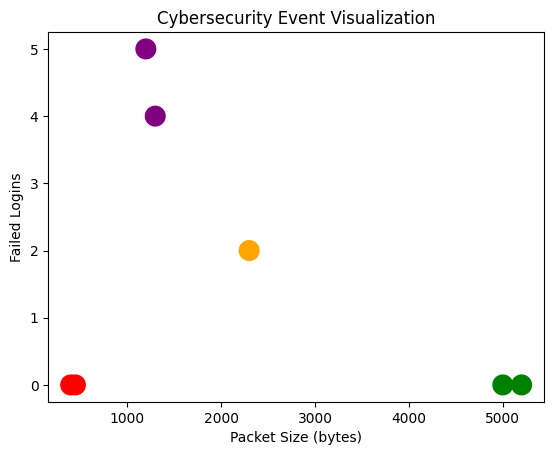

   event_type  event_label
0      normal            2
1    phishing            3
2  dos_attack            0
3     malware            1
4      normal            2


In [8]:
# Predict & evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Scatter plot (packet size vs failed logins)
colors = {0: 'green', 1: 'orange', 2: 'red', 3: 'purple'}  # normal, phishing, dos, malware
plt.scatter(df['packet_size'], df['failed_logins'],
            c=df['event_label'].map(colors), s=200)
plt.xlabel('Packet Size (bytes)')
plt.ylabel('Failed Logins')
plt.title('Cybersecurity Event Visualization')
plt.show()

# Show encoded labels
print(df[['event_type', 'event_label']].head())


Visualize how much each feature impacts the model's predictions.

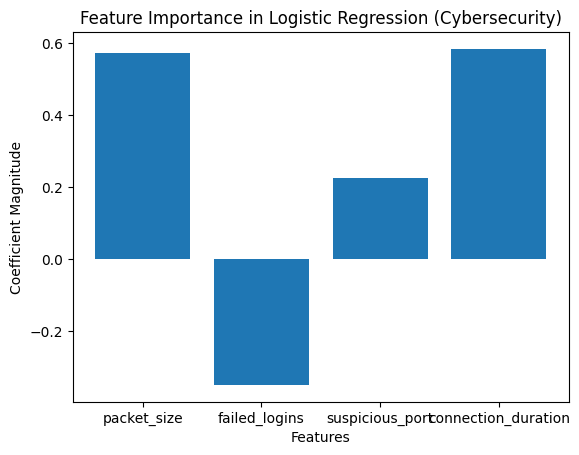

In [9]:
# Feature importance (coefficients)
importance = model.coef_[0]
features = ['packet_size', 'failed_logins', 'suspicious_port', 'connection_duration']
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression (Cybersecurity)')
plt.show()


Now, we can create test input to see what the model predicts. Remember:

**Normal** (packet_size=400, failed_logins=0, suspicious_port=0, connection_duration=60) – Normal browsing, logins, or web requests

**Phishing** (packet_size=1200, failed_logins=5, suspicious_port=0, connection_duration=10) – Multiple failed login attempts, short suspicious sessions

**DoS Attack** (packet_size=5000, failed_logins=0, suspicious_port=1, connection_duration=300) – Flooding traffic with very large packets on unusual ports

**Malware** (packet_size=2300, failed_logins=2, suspicious_port=1, connection_duration=100) – Some login attempts, then hidden connections on odd ports

In [12]:
# --- User Input Prediction ---
print("\nEnter details of a new event to classify:")

packet_size = float(input("Packet size (bytes): "))
failed_logins = int(input("Number of failed logins: "))
suspicious_port = int(input("Suspicious port used? (0 = No, 1 = Yes): "))
connection_duration = float(input("Connection duration (seconds): "))

# Put into list for model
new_event = [[packet_size, failed_logins, suspicious_port, connection_duration]]

# Scale with same scaler
new_event_scaled = scaler.transform(new_event)

# Predict
prediction = model.predict(new_event_scaled)
print("\nPredicted event type:", le.inverse_transform(prediction)[0])

# Show probabilities too
probs = model.predict_proba(new_event_scaled)
print("Prediction probabilities:")
for label, prob in zip(le.classes_, probs[0]):
    print(f"  {label}: {prob:.2f}")



Enter details of a new event to classify:
Packet size (bytes): 4800
Number of failed logins: 0
Suspicious port used? (0 = No, 1 = Yes): 1
Connection duration (seconds): 300

Predicted event type: dos_attack
Prediction probabilities:
  dos_attack: 0.83
  malware: 0.11
  normal: 0.05
  phishing: 0.02


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
